## About

The project is about an analysis of Indeed Job Postings for Data Science Roles for the month of August 2018. Data was manipulated to extract insights. Credit goes to , who scrapped the data.

### Import necessary libraries

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [61]:
df = pd.read_csv("alldata.csv")
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


### Exploring the data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
reviews        5326 non-null float64
location       6953 non-null object
dtypes: float64(1), object(4)
memory usage: 272.1+ KB


In [63]:
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


The **Reviews** Column in the data seems to be the only numeric column. It gives information about the number of reviews for each job posting.

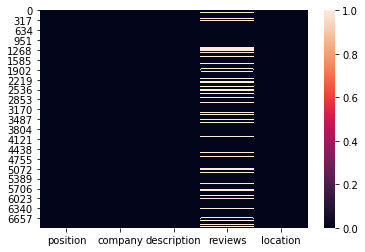

In [64]:
sns.heatmap(df.isnull())

In [65]:
rev_nul = df[['reviews']].isnull()

print('Null entries in the Reviews column:', len(rev_nul[rev_nul['reviews'] == True]))
print('Non-null entries in the Reviews column:', len(rev_nul[rev_nul['reviews'] == False]))

Null entries in the Reviews column: 1638
Non-null entries in the Reviews column: 5326


Giving the absence of too many entries in the **Reviews** Column, in such a case as this, it is advisable to drop the column

In [66]:
df.drop(['reviews'], axis = 1, inplace = True)

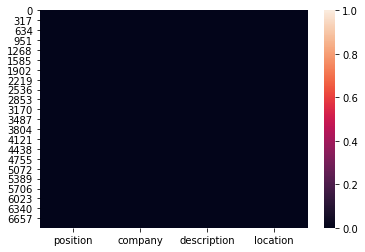

In [67]:
sns.heatmap(df.isnull())

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 4 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
location       6953 non-null object
dtypes: object(4)
memory usage: 217.7+ KB


Of the non-null objects returned by the **``info``** method, the only ones accounted for in the reviews column. There's therefore a possibly that python picked strings containing **nan** as null. There **``where``** method can be used to solve this. Alternatively, since the supposed null values are a very small percentage as compared to the whole data, the entries can be dropped.

In [69]:
#where method
#df.where(pd.notna, 'nan')

In [70]:
df = df.dropna()

Now that the null values have been dealt with, more exploration can be done easily to gain insight

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 4 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
location       6953 non-null object
dtypes: object(4)
memory usage: 271.6+ KB


There are quite a number of ways to go about extracting insights. 

### Companies

Companies can be with their demand for workers in the data science roles.

In [72]:
df['company'].value_counts()

Amazon.com                                           358
Ball Aerospace                                       187
Microsoft                                            137
Google                                               134
NYU Langone Health                                    77
Fred Hutchinson Cancer Research Center                70
KPMG                                                  66
Lab126                                                50
Broad Institute                                       49
Facebook                                              49
Walmart eCommerce                                     45
McKinsey & Company                                    41
University of Washington                              39
Harnham                                               39
Takeda Pharmaceutical                                 39
Celgene Corporation                                   34
Oath Inc                                              34
Pharmacyclics, an Abbvie Compan

In [73]:
df['company'].value_counts().head(50)

Amazon.com                                358
Ball Aerospace                            187
Microsoft                                 137
Google                                    134
NYU Langone Health                         77
Fred Hutchinson Cancer Research Center     70
KPMG                                       66
Lab126                                     50
Broad Institute                            49
Facebook                                   49
Walmart eCommerce                          45
McKinsey & Company                         41
University of Washington                   39
Harnham                                    39
Takeda Pharmaceutical                      39
Celgene Corporation                        34
Oath Inc                                   34
Pharmacyclics, an Abbvie Company           34
Cymer                                      32
Brigham & Women's Hospital(BWH)            31
Biogen                                     30
Sanofi                            

In [74]:
company_df = pd.DataFrame(df['company'].value_counts().head(50))

In [75]:
company_df.reset_index(inplace = True)
company_df.head()

,index,company
0,Amazon.com,358
1,Ball Aerospace,187
2,Microsoft,137
3,Google,134
4,NYU Langone Health,77


In [76]:
company_df.rename(columns = {'index' : 'company', 'company' : 'count'}, inplace = True)

In [77]:
company_df.head()

,company,count
0,Amazon.com,358
1,Ball Aerospace,187
2,Microsoft,137
3,Google,134
4,NYU Langone Health,77


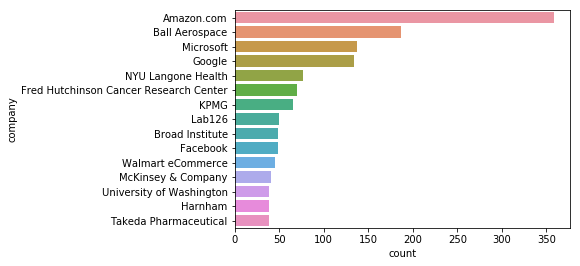

In [78]:
sns.barplot(y = company_df['company'].head(15), x = company_df['count'].head(15))

In [79]:
writer = pd.ExcelWriter('Companies.xlsx')
company_df.to_excel(writer,'Sheet1')
writer.save()

In [80]:
pd.read_excel('Companies.xlsx')

,company,count
0,Amazon.com,358
1,Ball Aerospace,187
2,Microsoft,137
3,Google,134
4,NYU Langone Health,77
5,Fred Hutchinson Cancer Research Center,70
6,KPMG,66
7,Lab126,50
8,Broad Institute,49
9,Facebook,49


### Roles

As was the case with companies, a stat of the roles advertised can also be carried out. The roles come in quite some variance, that would differ from month to month.

In [81]:
df['position'].value_counts().head(20)

Data Scientist                         351
Senior Data Scientist                   96
Research Analyst                        64
Data Engineer                           60
Machine Learning Engineer               56
Lead Data Scientist                     31
Research Scientist                      30
Sr. Data Scientist                      28
Principal Data Scientist                24
Software Engineer                       22
Data Analyst                            22
Quantitative Analyst                    21
Product Manager                         17
Scientist                               17
Bioinformatics Scientist                16
Market Research Analyst                 15
Senior Software Engineer                14
Machine Learning Scientist              13
Software Engineer, Machine Learning     13
Senior Research Analyst                 12
Name: position, dtype: int64

In [82]:
roles_df = pd.DataFrame(df['position'].value_counts().head(20))

In [83]:
roles_df.reset_index(inplace = True)

In [84]:
roles_df.rename(columns = {'index' : 'position', 'position' : 'count'}, inplace = True)

In [85]:
roles_df.head()

,position,count
0,Data Scientist,351
1,Senior Data Scientist,96
2,Research Analyst,64
3,Data Engineer,60
4,Machine Learning Engineer,56


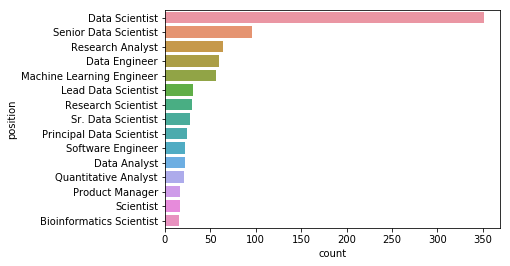

In [86]:
sns.barplot(y = roles_df['position'].head(15), x = roles_df['count'].head(15))

In [87]:
#roles_df.to_csv('Roles.csv', sep = ',', header = ['position', 'count'])

In [88]:
#roles_df.to_csv('Roles.csv', sep = ',')

In [89]:
#pd.read_csv('Roles.csv')

In [90]:
writer = pd.ExcelWriter('Roles.xlsx')
roles_df.to_excel(writer,'Sheet1')
writer.save()

In [91]:
pd.read_excel('Roles.xlsx')

,position,count
0,Data Scientist,351
1,Senior Data Scientist,96
2,Research Analyst,64
3,Data Engineer,60
4,Machine Learning Engineer,56
5,Lead Data Scientist,31
6,Research Scientist,30
7,Sr. Data Scientist,28
8,Principal Data Scientist,24
9,Software Engineer,22


### Skills

Relevant skills to the roles will include Python, R, SQL, Hadoop, and so on. It's quite not a direct process picking out these skills from each entry in the description column as the scrapped data in the description aren't properly formatted as strings. 

In [92]:
df[['description']].head()

,description
0,Development Director\nALS Therapy Development ...
1,"Job Description\n\n""The road that leads to acc..."
2,"Growing company located in the Atlanta, GA are..."
3,DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,DESCRIPTION\nThe Emory University Department o...


In [93]:
df['description'][5]

"Qualifications\nBachelor’s degree in Computer Science, Information Systems or closely related field\n10+ years of experience in Data Architecture in a professional services environment is highly preferred\nExperience overseeing the data stream of multiple projects including client deployments, integration and migration efforts\nExpertise in handling large amounts of data through such capabilities as SQL Server, Postgres, Exasol, Alteryx and Hadoop ecosystem\nExperience working in cloud architecture including AWS or Azure environments\nExceptional analytical and quantitative problem solving skills\nAdept at communicating and managing key stakeholders and able to drive change in the organization\nAbility to work collaboratively in a team environment and provide continuous mentoring to junior members of the organization\nEntrepreneurial spirit with desire to work in fast-paced, start-up environment, with the ability to consistently deliver exceptional results on demanding timelines\nTrav

With a single description looking like this, it will be tasking to go through over 6000 rows searching for skills. 

In [94]:
type(df['description'][5])

str

In [95]:
df['description'][5].splitlines()

['Qualifications',
 'Bachelor’s degree in Computer Science, Information Systems or closely related field',
 '10+ years of experience in Data Architecture in a professional services environment is highly preferred',
 'Experience overseeing the data stream of multiple projects including client deployments, integration and migration efforts',
 'Expertise in handling large amounts of data through such capabilities as SQL Server, Postgres, Exasol, Alteryx and Hadoop ecosystem',
 'Experience working in cloud architecture including AWS or Azure environments',
 'Exceptional analytical and quantitative problem solving skills',
 'Adept at communicating and managing key stakeholders and able to drive change in the organization',
 'Ability to work collaboratively in a team environment and provide continuous mentoring to junior members of the organization',
 'Entrepreneurial spirit with desire to work in fast-paced, start-up environment, with the ability to consistently deliver exceptional results 

In [96]:
type(df['description'][5].splitlines())

list

In [97]:
df['description'][5].splitlines()[-1]

'Additionally, you’ll maintain database performance by identifying and resolving production and application development problems; calculating optimum values for parameters; evaluating, integrating, and installing new releases; completing maintenance and answering questions. You will provide database support by coding utilities, responding to user questions, and resolving problems.'

___

#### Skill Count

A simple hack is to find out how many times a particular skill appears in the data. One way to do this is to conduct some sort of search. Approaches abound to doing this, but the ``.str.contains()`` is quite easy to come by. A first step willbe by setting the keyword to **python**.

In [98]:
df[df['description'].str.contains('python', case = False)]

,position,company,description,location
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
14,Business Intelligence Data Science Analyst - S...,Newell Brands,Data Science Analyst– Business Intelligence\nL...,"Atlanta, GA"
15,Data Scientist,Cotiviti,Cotiviti is looking for an industry leading Da...,"Atlanta, GA"
18,Data Scientist,Relus Cloud,DATA SCIENTIST\n\nSUMMARY:\nAs an Amazon Web S...,"Atlanta, GA"
19,Data Scientist,Inspire Brands,This position is critical to understanding dri...,"Atlanta, GA"
21,"Sr. Manager, Full Stack Development, KPMG Tax ...",KPMG,Known for being a great place to work and buil...,"Atlanta, GA 30338"
22,Data Scientist,Norfolk Southern Corp,Join a growing Data Science and Advanced Analy...,"Atlanta, GA 30309"
23,DATA SCIENTIST - Supply Chain,The Home Depot,POSITION PURPOSE:\nA Data Scientist leverages ...,"Atlanta, GA"
24,"Data Scientist, Keying & Linking",Equifax,Job Number: 16614\nPosition Title:\nExternal D...,"Atlanta, GA"


With the ``len`` method, the number of entries with in the description column with the word "python" can be counted.

In [99]:
len(df[df['description'].str.contains('python', case = False)])

2852

The same process can be carried out to compute how many times other skills of interest appear in the data.

In [100]:
print('python:', len(df[df['description'].str.contains('python', case = False)]))
print('excel:', len(df[df['description'].str.contains('excel', case = False)]))
print('sas:', len(df[df['description'].str.contains('sas', case = False)]))

python: 2852
excel: 3566
sas: 853


The case of the ``R`` language is quiet different, as it is denoted by capital letter **R** standing alone. Python can mistake "r" anywhere within the strings for this, and whether it stands alone or not if not instructed properly, the interpretation will always be wrong. The piece of code is therefore written a little differently.

In [101]:
len(df[df['description'].str.contains(' R |R ', case = True)])

1509

Trying it any other way will produce other results.

In [102]:
print(len(df[df['description'].str.contains(' R', case = True)]))
print(len(df[df['description'].str.contains('R ', case = True)]))
print(len(df[df['description'].str.contains('R', case = True)]))
print(len(df[df['description'].str.contains(' R ', case = True)]))

5740
1509
6590
515


For a larger number of skills (pegged at ten selected ones), a function can be defined for the same computation.

In [103]:
def gen_skills(frame, col):
    
    #generic skills
    skils = ['python', 'excel', 'tableau', 'sas', 'sql', 'java', 'html', 'machine learning', 'hadoop', 'matlab']
    
    #gen_len
    ski_len_li = []
    ski_len_li.append(len(frame[frame[col].str.contains(' R |R ', case = True)]))
    for i in skils:
        ski_len_li.append(len(frame[frame[col].str.contains(i, case = False)]))
    
    skill_list = ['R', 'python', 'Excel', 'Tableau', 'SAS', 'SQL', 'Java', 'HTML', 'ML',
                  'Hadoop', 'MatLab']
    
    len_series = list(zip(skill_list, ski_len_li))
    
    return pd.DataFrame(len_series, columns = ['Skills', 'Count'])

In [104]:
skills_df = gen_skills(df, 'description')

In [105]:
skills_df

,Skills,Count
0,R,1509
1,python,2852
2,Excel,3566
3,Tableau,492
4,SAS,853
5,SQL,1924
6,Java,1397
7,HTML,205
8,ML,2452
9,Hadoop,925


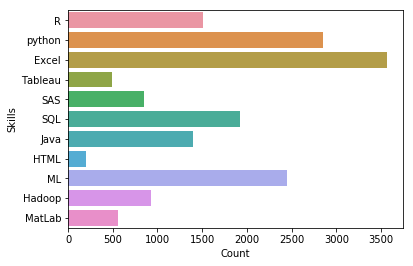

In [106]:
sns.barplot(y = skills_df['Skills'].head(15), x = skills_df['Count'].head(15))

In [107]:
writer = pd.ExcelWriter('Skills.xlsx')
skills_df.to_excel(writer,'Sheet1')
writer.save()

In [108]:
pd.read_excel('Skills.xlsx')

,Skills,Count
0,R,1509
1,python,2852
2,Excel,3566
3,Tableau,492
4,SAS,853
5,SQL,1924
6,Java,1397
7,HTML,205
8,ML,2452
9,Hadoop,925


Knowledge of **Machine Learning Algorithms** are also quite important determinants for Data Roles. A few of the popular ML algorithms have been chosen, and function similar to ``gen_skills`` can be used to compute the frequency of these algorithms in description column of the data.

In [109]:
def ml_algo(frame, col):
    
    #algo
    algo_li = ['neural nets|neural networks', 'linear regression', 'logistic regression', 'decision tree', 
              'random forest', 'natural language processing|nlp', 'support vector machine|svm', 
               'k means|kmeans|k means clustering', 'pca|principal component', 'bayes', 'linear discriminant']
    
    #algo_len_list
    algo_len_li = []
    for i in algo_li:
        algo_len_li.append(len(frame[frame[col].str.contains(i, case = False)]))
    
    algori_li = ['Neural Networks', 'Linear Regression', 
                  'Logistic Regression', 'Decision Trees', 'Random Forest', 'NLP', 'SVM', 
                  'Kmeans', 'KNN', 'PCA', 'Bayes', 'LDA']
    
    len_series = list(zip(algori_li, algo_len_li))
    
    return pd.DataFrame(len_series, columns = ['Skills', 'Count'])

In [110]:
algo_df = ml_algo(df, 'description')

In [111]:
algo_df

,Skills,Count
0,Neural Networks,314
1,Linear Regression,62
2,Logistic Regression,95
3,Decision Trees,153
4,Random Forest,130
5,NLP,628
6,SVM,127
7,Kmeans,17
8,KNN,42
9,PCA,195


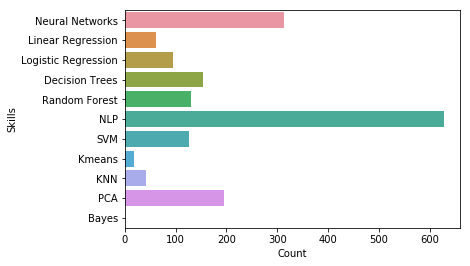

In [112]:
sns.barplot(y = algo_df['Skills'], x = algo_df['Count'].head(15))

In [113]:
writer = pd.ExcelWriter('Algorithms.xlsx')
algo_df.to_excel(writer,'Sheet1')
writer.save()

In [114]:
pd.read_excel('Algorithms.xlsx')

,Skills,Count
0,Neural Networks,314
1,Linear Regression,62
2,Logistic Regression,95
3,Decision Trees,153
4,Random Forest,130
5,NLP,628
6,SVM,127
7,Kmeans,17
8,KNN,42
9,PCA,195


### Fancy Visualization

Fancy visualizations isn't one of this environment, hence Tableau, amongst other alternative are good options. The data exported from here can be used to make these visualizations

### Conclusion

This are insights gleaned from just one month of job postings. Other months definitely would have variations. But in all, information from the Job Description cannot be misleading, and can serve advisory role to folks seeking opportunities. There are others ways the data can be manipulated to get insights from it. Features like the location, education and so on can be brought out the data.